<a href="https://colab.research.google.com/github/krec7748/DeepLearning_Study/blob/main/CH03_Sigmoid_and_Softmax.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. The Graphs of Odds, Logit and Sigmoid

### 1. The Graphs of Odds and Logit

Text(0.5, 0, 'Probability')

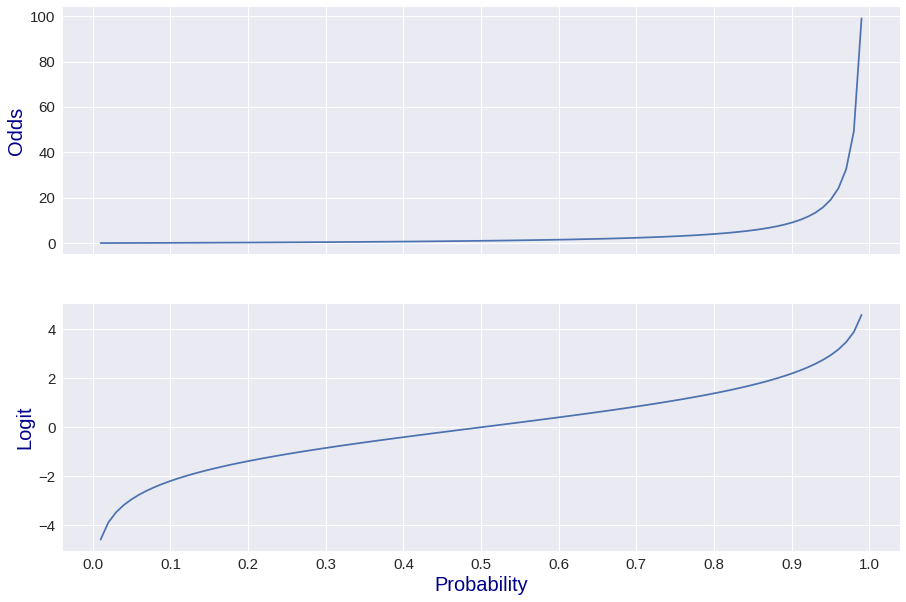

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#Numpy
p_np = np.linspace(0.01, 0.99, 100)
odds_np = p_np / (1-p_np)
logit_np = np.log(odds_np)

#Visualization
plt.style.use("seaborn")
fig, axes = plt.subplots(2, 1, figsize = (15, 10), sharex = True)

axes[0].plot(p_np, odds_np)
axes[1].plot(p_np, logit_np)

xticks = np.arange(0, 1.1, 0.1)

axes[0].tick_params(labelsize = 15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel("Odds", fontsize = 20, color = "darkblue")

axes[1].tick_params(labelsize = 15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel("Logit", fontsize = 20, color = "darkblue")

axes[1].set_xlabel("Probability", fontsize = 20, color = "darkblue")

Text(0.5, 0, 'Probability')

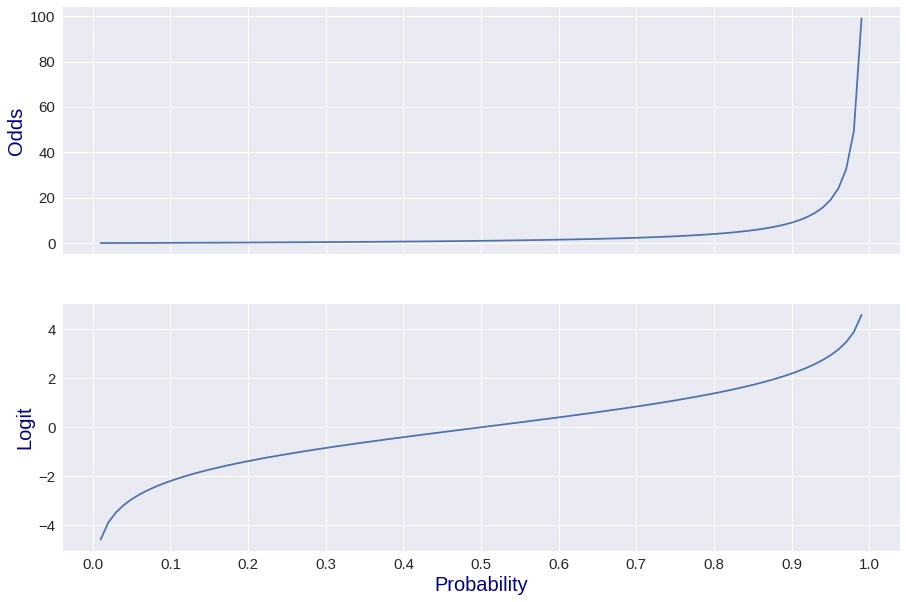

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

#Tensorflow
p_tf = tf.linspace(0.01, 0.99, 100)
odds_tf = p_tf / (1-p_tf)
logit_tf = tf.math.log(odds_tf)

#Visualization
plt.style.use("seaborn")
fig, axes = plt.subplots(2, 1, figsize = (15, 10), sharex = True)

axes[0].plot(p_tf, odds_tf.numpy())
axes[1].plot(p_tf, logit_tf.numpy())

xticks = np.arange(0, 1.1, 0.1)

axes[0].tick_params(labelsize = 15)
axes[0].set_xticks(xticks)
axes[0].set_ylabel("Odds", fontsize = 20, color = "darkblue")

axes[1].tick_params(labelsize = 15)
axes[1].set_xticks(xticks)
axes[1].set_ylabel("Logit", fontsize = 20, color = "darkblue")

axes[1].set_xlabel("Probability", fontsize = 20, color = "darkblue")

### 2. The Graph of Sigmoid

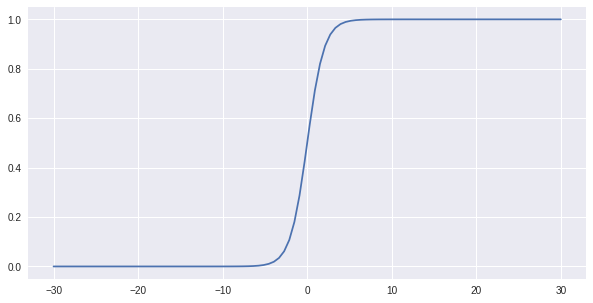

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

x = tf.linspace(-30, 30, 100)
sigmoid = Activation("sigmoid")(x)

fig, ax = plt.subplots(figsize = (10, 5))
ax.plot(x.numpy(), sigmoid.numpy())

## 2. Logistic Regression Models

### 1. Single-variate Logistic Regression Models

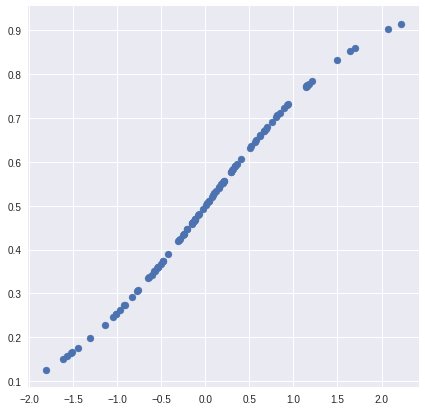

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

X = tf.random.normal(shape = (100, 1))
dense = Dense(units = 1, activation = "sigmoid")

Y = dense(X)

plt.style.use("seaborn")
fig, ax = plt.subplots(figsize = (7, 7))
ax.scatter(X.numpy().flatten(), Y.numpy().flatten())

### 2. Multi-variate Logistic Regression Models

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense
import matplotlib.pyplot as plt

X = tf.random.normal(shape = (100, 5))
dense = Dense(units = 1, activation = "sigmoid")

Y = dense(X)
print(Y.shape)

(100, 1)


## 3. Binary Classifier with Dense Layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(units = 10, activation = "relu"))
model.add(Dense(units = 5, activation = "relu"))

#Last layer's activation function: sigmoid & units : 1
model.add(Dense(units = 1, activation = "sigmoid"))

## 4. Softmax Layers

### 1. Input/Output of Softmax

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Activation

logit = tf.random.uniform(shape = (4, 5), minval = -10, maxval = 10)

softmax_value = Activation("softmax")(logit)
softmax_sum = tf.reduce_sum(softmax_value, axis = 1)
print("Logits: \n {}\n".format(logit.numpy()))
print("Probabilites: \n {}\n".format(softmax_value.numpy()))
print("Sum of softmax values: \n {}\n".format(softmax_sum))

Logits: 
 [[ 3.6745815  2.740984  -6.0458565  6.460884  -6.2864113]
 [ 3.8401623  1.7293882 -6.09113   -3.7395859 -8.070703 ]
 [-3.751545  -1.1088486  7.4298    -0.2724743 -9.702547 ]
 [-1.7658119  6.80904   -9.523697   7.0779343 -7.0101404]]

Probabilites: 
 [[5.6772452e-02 2.2319341e-02 3.4088278e-06 9.2090213e-01 2.6799919e-06]
 [8.9149588e-01 1.0799952e-01 4.3352509e-05 4.5527791e-04 5.9882027e-06]
 [1.3922474e-05 1.9562522e-04 9.9933892e-01 4.5149983e-04 3.6243410e-08]
 [8.1774968e-05 4.3314296e-01 3.4947305e-08 5.6677479e-01 4.3155626e-07]]

Sum of softmax values: 
 [1.         0.99999994 1.         0.99999994]



### 2. Softmax in Dense Layers

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Dense

logit = tf.random.uniform(shape = (4, 5), minval = -10, maxval = 10)
dense = Dense(units = 8, activation = "softmax")

Y = dense(logit)
print(tf.reduce_sum(Y, axis = 1))

tf.Tensor([1.         1.         0.99999994 1.        ], shape=(4,), dtype=float32)


## 5. Multi-class Classifier

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense

class TestModel(Model):
    def __init__(self):
        super(TestModel, self).__init__()

        self.dense_01 = Dense(units = 8, activation = "relu")
        self.dense_02 = Dense(units = 5, activation = "relu")
        self.dense_03 = Dense(units = 3, activation = "softmax")

    def call(self, x):
        print("X: \n{}\n{}\n".format(x.shape, x.numpy()))

        x = self.dense_01(x)
        print("A1: \n{}\n{}\n".format(x.shape, x.numpy()))

        x = self.dense_02(x)
        print("A2: \n{}\n{}\n".format(x.shape, x.numpy()))

        x = self.dense_03(x)
        print("A2: \n{}\n{}\n".format(x.shape, x.numpy()))
        print("Sum of vectors: {}\n".format(tf.reduce_sum(x, axis = 1)))
        return x


model = TestModel()

X = tf.random.uniform(shape = (4, 5), minval = -10, maxval = 10)
Y = model(X)

X: 
(4, 5)
[[-4.370332    4.218914   -1.5586262   2.0472221  -5.008955  ]
 [-4.9691796   6.0017796  -5.900488    1.0213804  -6.945882  ]
 [ 2.9826689  -9.6924095  -9.844923    9.299118   -0.9191723 ]
 [ 0.98302364 -2.912836    1.9684792  -5.3040266  -4.74257   ]]

A1: 
(4, 8)
[[0.         0.         0.         0.         4.17701    0.
  2.9721365  0.        ]
 [0.         0.         0.         0.         8.249217   0.
  3.298886   0.        ]
 [3.65724    0.         0.         6.878702   0.38756478 0.78470415
  5.7233305  0.        ]
 [3.5066025  0.         4.8698654  3.2756805  4.0837336  0.
  0.         0.        ]]

A2: 
(4, 5)
[[0.        1.4339784 0.        1.6580917 0.       ]
 [0.        3.2604373 0.        3.3625588 0.5832062]
 [0.        0.        1.7024481 2.1662378 0.       ]
 [0.        2.457756  0.5719743 0.6412219 0.       ]]

A2: 
(4, 3)
[[0.22765285 0.2985352  0.47381192]
 [0.06723741 0.29708588 0.63567674]
 [0.5095807  0.3214822  0.16893707]
 [0.21977448 0.45906386 0.3